In [1]:
import argparse
import json
import logging
import os

from rgnn_at_scale.local import setup_logging, build_configs_and_run
import experiment_train
import matplotlib.pyplot as plt


/nfs/homedirs/schmidtt/miniconda3/lib/python3.8/site-packages/seml/database.py:8: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
run_config = {'dataset': 'cora_ml',
              'binary_attr': True,
              'seed': 0,
              'train_params': {'lr': 0.01,
               'weight_decay': 0.001,
               'patience': 300,
               'max_epochs': 3000},
              'artifact_dir': 'cache',
              'model_storage_type': 'pretrained',
              'device': 0,
              'model_params': {'label': 'Robust RGNN',
               'model': 'GCN',
               'do_cache_adj_prep': True,
               'n_filters': 64,
               'dropout': 0.5,
               'svd_params': None,
               'jaccard_params': None,
               'gdc_params': None},
              'display_steps': 100
 }

In [4]:
print("Start Training")
results = experiment_train.run(**run_config)

2020-12-21 14:56:44 (INFO): {'dataset': 'cora_ml', 'model_params': {'label': 'Robust RGNN', 'model': 'GCN', 'do_cache_adj_prep': True, 'n_filters': 64, 'dropout': 0.5, 'svd_params': None, 'jaccard_params': None, 'gdc_params': None}, 'train_params': {'lr': 0.01, 'weight_decay': 0.001, 'patience': 300, 'max_epochs': 3000}, 'binary_attr': True, 'seed': 0, 'artifact_dir': 'cache', 'model_storage_type': 'pretrained', 'device': 0, 'display_steps': 100}


Start Training
Training set size:  140
Validation set size:  140
Test set size:  2530
()
{'in_channels': 2879, 'out_channels': 64}
()
{'in_channels': 64, 'out_channels': 7}


2020-12-21 14:56:47 (INFO): 
Epoch    0: loss_train: 1.95136, loss_val: 1.94933, acc_train: 0.15000, acc_val: 0.15714 
2020-12-21 14:56:47 (INFO): 
Epoch  100: loss_train: 0.01748, loss_val: 0.45113, acc_train: 1.00000, acc_val: 0.87857 
2020-12-21 14:56:48 (INFO): 
Epoch  200: loss_train: 0.01437, loss_val: 0.45645, acc_train: 1.00000, acc_val: 0.85714 
2020-12-21 14:56:48 (INFO): 
Epoch  300: loss_train: 0.01307, loss_val: 0.49618, acc_train: 1.00000, acc_val: 0.86429 
2020-12-21 14:56:48 (INFO): 
Epoch  400: loss_train: 0.01730, loss_val: 0.46955, acc_train: 1.00000, acc_val: 0.88571 
2020-12-21 14:56:48 (INFO): Test accuracy is 0.8233201503753662 with seed 0
2020-12-21 14:56:48 (INFO): Lock 140145380503856 acquired on cache/pretrained.json.lock
2020-12-21 14:56:48 (INFO): Lock 140145380503856 released on cache/pretrained.json.lock


In [5]:
"Test accuracy is "+ str(results["accuracy"])

'Test accuracy is 0.8233201503753662'

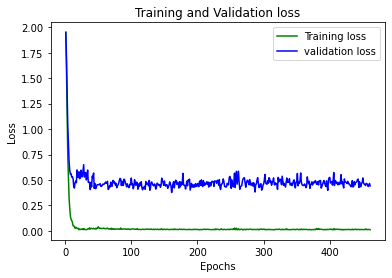

In [6]:
epochs = range(1, len(results["trace_train"]) + 1)
plt.plot(epochs, results["trace_train"], 'g', label='Training loss')
plt.plot(epochs, results["trace_val"], 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()